In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn import datasets
import matplotlib
import numpy as np
from sklearn import preprocessing
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM

Using TensorFlow backend.


In [2]:
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.serif'] = ['SimHei'] 

In [3]:
data1 = pd.read_excel(r'../data/DATA_XUNLIAN_1.xlsx')
pd.date_range(start = '2019-1-1',periods = len(data1),freq ="D").values 
data1["Time"] = pd.date_range(start = '2019-1-1',periods = len(data1),freq ="D").values

In [4]:
data = data1.drop(columns = ['Time'])

In [5]:
from numpy import array
import numpy
from pandas import read_csv
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from sklearn.metrics import mean_squared_error #均方误差
from sklearn.metrics import mean_absolute_error #平方绝对误差
plt.rcParams['font.sans-serif']=['SimHei']

In [6]:
def build_model(train_x, train_y,test_x, test_y):
    model = Sequential()
    model.add(LSTM(200,activation='relu',input_shape=(50,3)))
    model.add(Dense(12, input_dim=1,activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer='adam')
    model.fit(train_x, train_y, epochs=50, batch_size=64, verbose=0,validation_data=(test_x,test_y))

    plt.figure(figsize=(20,10))
    plt.plot(model.history.history['loss'])
    plt.plot(model.history.history['val_loss'])
    plt.title("LSTM：Dataset NO.1: MAE", fontsize=20)
    plt.ylabel("MAE", fontsize=20)
    plt.xlabel("epoch", fontsize=20)
    plt.legend(["train","test"],loc="upper left", fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()
    
    print(model.summary())
    return model

In [7]:
dmax = numpy.max(data.values, axis=0)
dmin = numpy.min(data.values, axis=0)
for i in range(data.values.shape[1]):
    data.values[:, i] = (data.values[:, i] - dmin[i])/(dmax[i] - dmin[i])

In [8]:
timestep = 50
def gen_data(dataset, timestep):
    XX = []
    YY = []
    for i in range(dataset.shape[0] - timestep - 1):
        XX.append(dataset[i:i+timestep, :])
        YY.append(dataset[i+timestep, 2])

    train_X = XX[:int(0.7 * len(XX))]
    train_X = array(train_X)

    train_Y = YY[:int(0.7 * len(XX))]
    train_Y = array(train_Y)

    test_X = XX[int(0.7 * len(XX)):]
    test_X = array(test_X)

    test_Y = YY[int(0.7 * len(XX)):]
    test_Y = array(test_Y)

    return train_X, train_Y, test_X, test_Y

In [9]:
train_X, train_Y, test_X, test_Y = gen_data(data.values,50)

In [10]:
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

(2283, 50, 3) (2283,) (979, 50, 3) (979,)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.



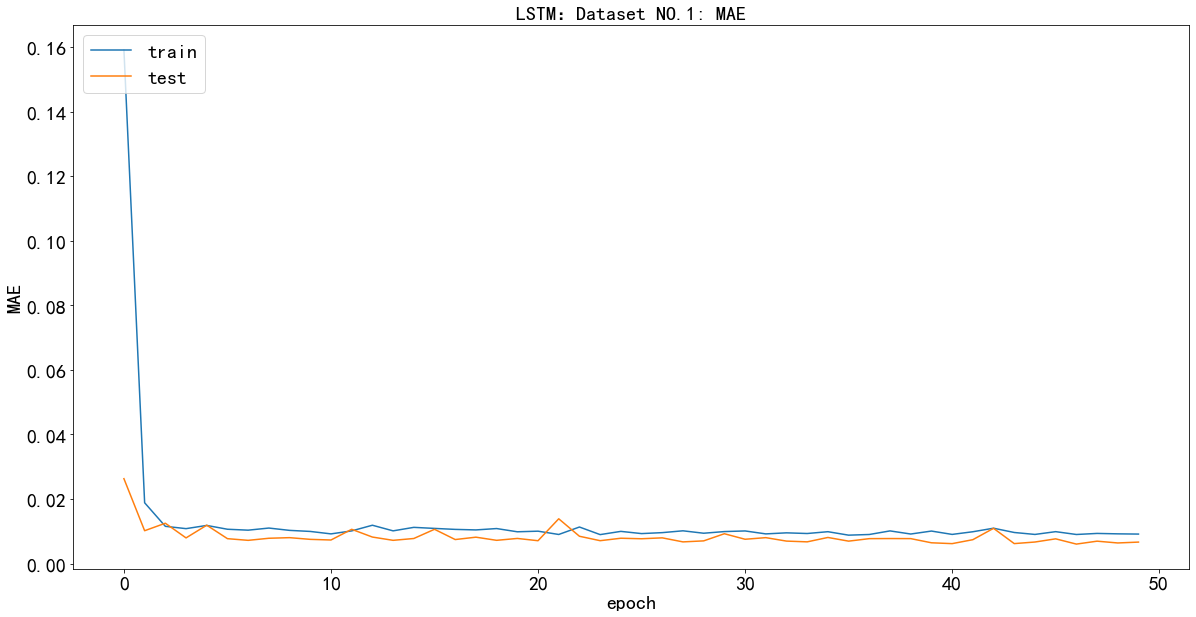

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 200)               163200    
_________________________________________________________________
dense_1 (Dense)              (None, 12)                2412      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 165,625
Trainable params: 165,625
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
model = build_model(train_X, train_Y, test_X, test_Y)
pre_train = model.predict(train_X)
pre_test = model.predict(test_X)

In [12]:
pre_train = pre_train * (dmax[2] - dmin[2]) + dmin[2]
train_Y = train_Y * (dmax[2] - dmin[2]) + dmin[2]
pre_test = pre_test * (dmax[2] - dmin[2]) + dmin[2]
test_Y = test_Y * (dmax[2] - dmin[2]) + dmin[2]

In [13]:
s0_train = mean_squared_error(pre_train, train_Y)
s1_train = mean_absolute_error(pre_train, train_Y)

In [14]:
s0_test = mean_squared_error(pre_test, test_Y)
s1_test = mean_absolute_error(pre_test, test_Y)

In [15]:
print('training set MSE:', s0_train)
print('training set MAE:', s1_train)
print('testing set MSE:', s0_test)
print('testing set MAE:', s1_test)

training set MSE: 0.005484276382346013
training set MAE: 0.05819129425342074
testing set MSE: 0.002289780132944056
testing set MAE: 0.0375787363987534


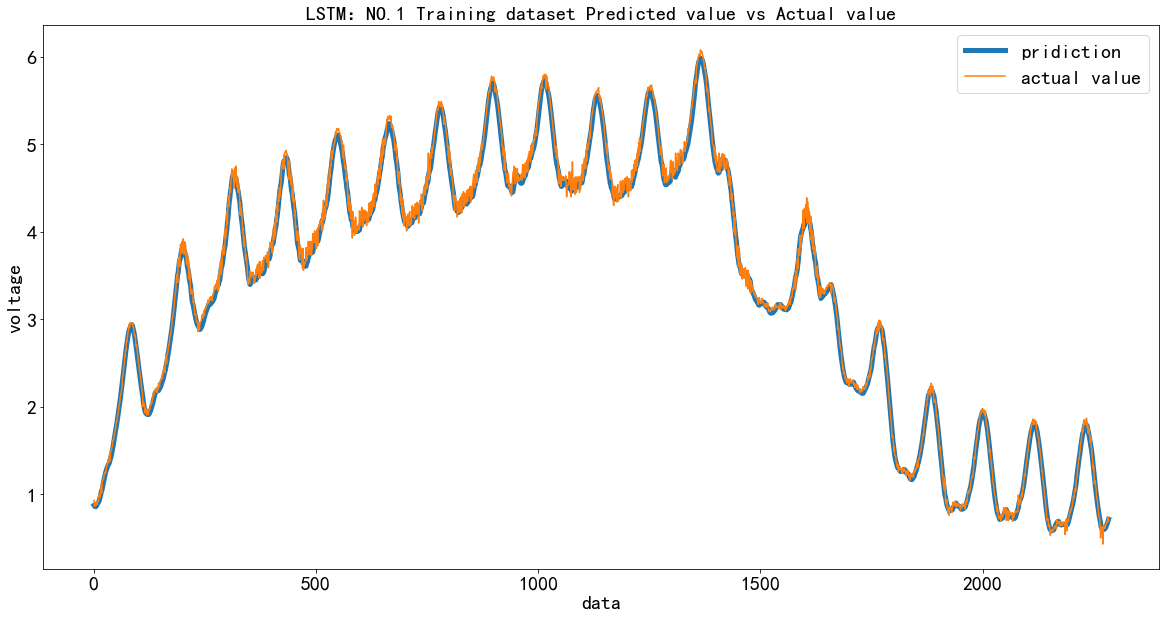

In [16]:
plt.figure(figsize=(20,10))
plt.plot([i + 1 for i in range(len(pre_train))], pre_train, label="pridiction",linewidth=5)
plt.plot([i + 1 for i in range(len(train_Y))], train_Y, label="actual value")
plt.legend(fontsize=20)
plt.ylabel('voltage', fontsize=20)
plt.xlabel('data',fontsize=20)
plt.title('LSTM：NO.1 Training dataset Predicted value vs Actual value', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

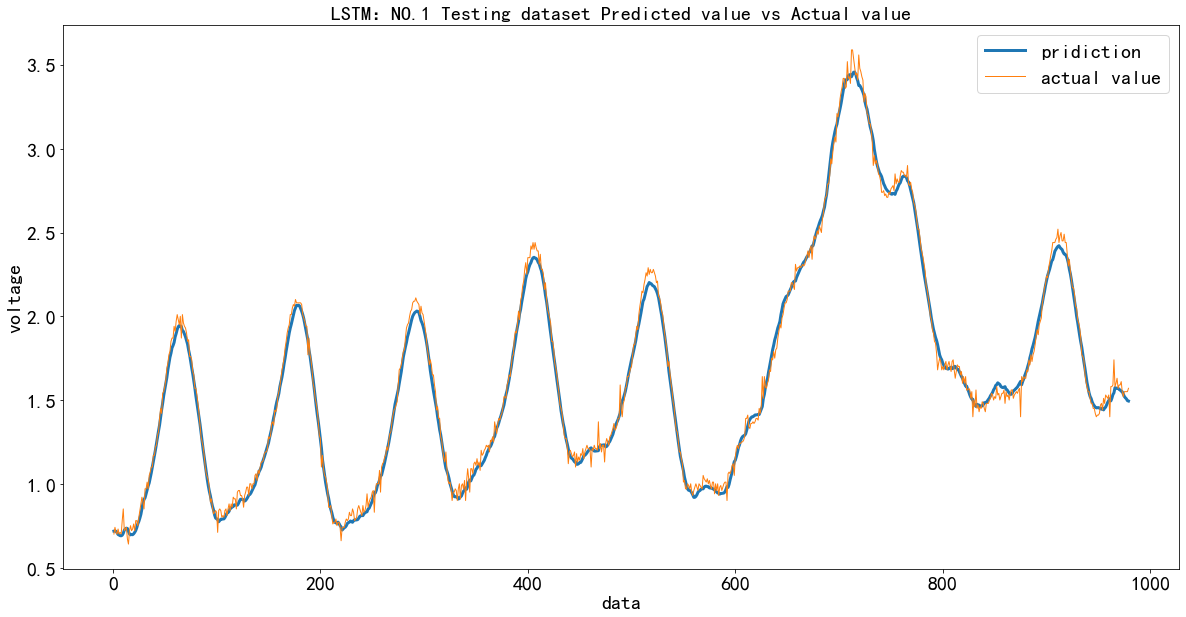

In [17]:
plt.figure(figsize=(20,10))
plt.plot([i + 1 for i in range(len(pre_test))], pre_test, label="pridiction",linewidth=3)
plt.plot([i + 1 for i in range(len(test_Y))], test_Y, label="actual value",linewidth=1)

plt.legend(fontsize=20)
plt.ylabel('voltage',fontsize=20)
plt.title('LSTM：NO.1 Testing dataset Predicted value vs Actual value',fontsize=20)
plt.xlabel('data',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [18]:
pre_test.shape

(979, 1)

In [19]:
test_Y.shape

(979,)

In [20]:
error = pre_test.ravel() - test_Y

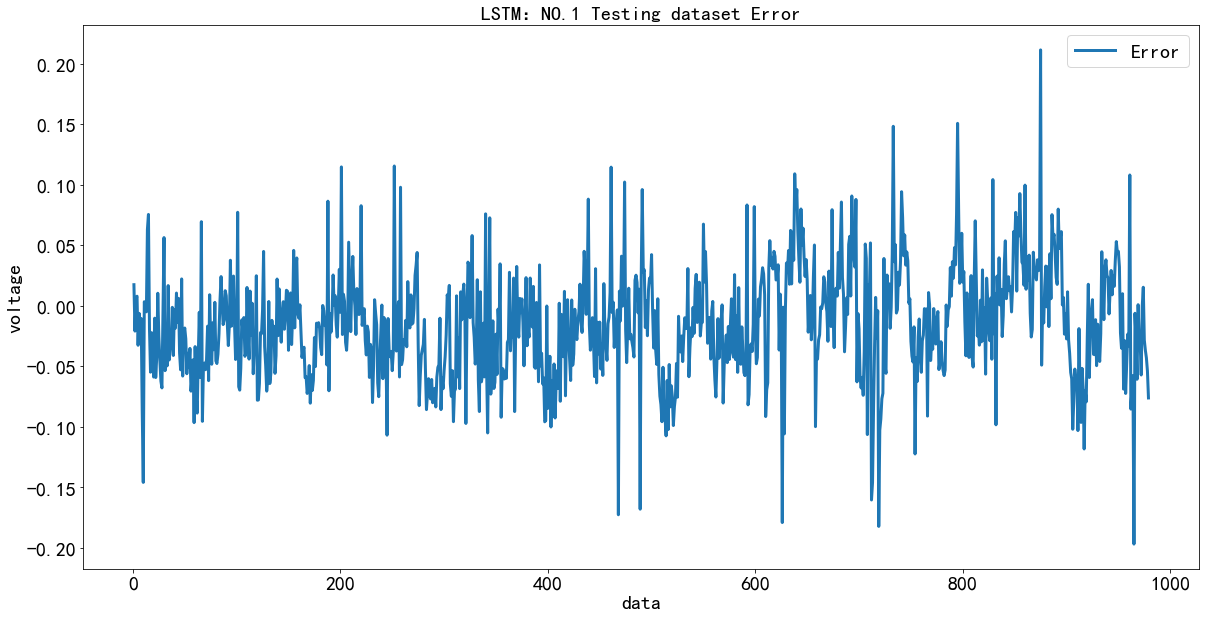

In [21]:
matplotlib.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(20,10))
plt.plot([i + 1 for i in range(len(pre_test))], error, label="Error",linewidth=3)

plt.legend(fontsize=20)
plt.ylabel('voltage',fontsize=20)
plt.title('LSTM：NO.1 Testing dataset Error',fontsize=20)
plt.xlabel('data',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [22]:
data1 = pd.read_excel(r'../data/DATA_XUNLIAN_2.xlsx')
pd.date_range(start = '2019-1-1',periods = len(data1),freq ="D").values 
data1["Time"] = pd.date_range(start = '2019-1-1',periods = len(data1),freq ="D").values

In [23]:
data = data1.drop(columns = ['Time'])

In [24]:
def build_model(train_x, train_y,test_x, test_y):
    model = Sequential()
    model.add(LSTM(200,activation='relu',input_shape=(50,3)))
    model.add(Dense(12, input_dim=1,activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer='adam')
    model.fit(train_x, train_y, epochs=50, batch_size=64, verbose=0,validation_data=(test_x,test_y))

    plt.figure(figsize=(20,10))
    plt.plot(model.history.history['loss'])
    plt.plot(model.history.history['val_loss'])
    plt.title("LSTM：Dataset NO.2: MAE", fontsize=20)
    plt.ylabel("MAE", fontsize=20)
    plt.xlabel("epoch", fontsize=20)
    plt.legend(["train","test"],loc="upper left", fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()
    
    print(model.summary())
    return model

In [25]:
dmax = numpy.max(data.values, axis=0)
dmin = numpy.min(data.values, axis=0)
for i in range(data.values.shape[1]):
    data.values[:, i] = (data.values[:, i] - dmin[i])/(dmax[i] - dmin[i])

In [26]:
timestep = 50
def gen_data(dataset, timestep):
    XX = []
    YY = []
    for i in range(dataset.shape[0] - timestep - 1):
        XX.append(dataset[i:i+timestep, :])
        YY.append(dataset[i+timestep, 2])

    train_X = XX[:int(0.7 * len(XX))]
    train_X = array(train_X)

    train_Y = YY[:int(0.7 * len(XX))]
    train_Y = array(train_Y)

    test_X = XX[int(0.7 * len(XX)):]
    test_X = array(test_X)

    test_Y = YY[int(0.7 * len(XX)):]
    test_Y = array(test_Y)

    return train_X, train_Y, test_X, test_Y

In [27]:
train_X, train_Y, test_X, test_Y = gen_data(data.values,50)

In [28]:
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

(2413, 50, 3) (2413,) (1035, 50, 3) (1035,)


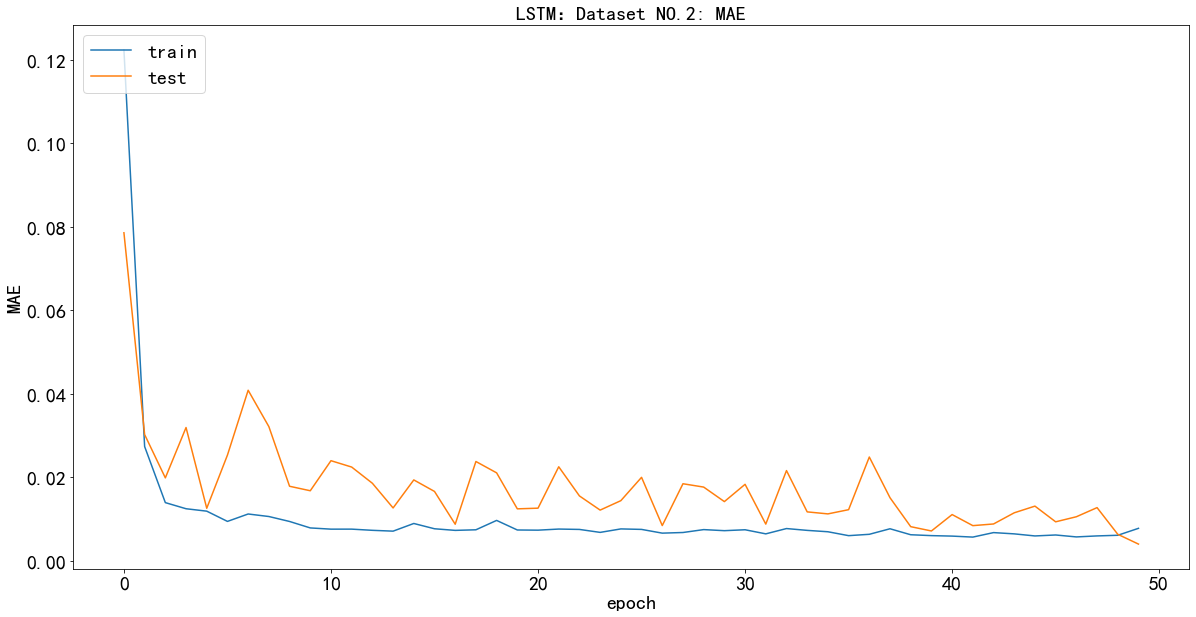

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 200)               163200    
_________________________________________________________________
dense_3 (Dense)              (None, 12)                2412      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 13        
Total params: 165,625
Trainable params: 165,625
Non-trainable params: 0
_________________________________________________________________
None


In [29]:
model = build_model(train_X, train_Y, test_X, test_Y)
pre_train = model.predict(train_X)
pre_test = model.predict(test_X)

In [30]:
pre_train = pre_train * (dmax[2] - dmin[2]) + dmin[2]
train_Y = train_Y * (dmax[2] - dmin[2]) + dmin[2]
pre_test = pre_test * (dmax[2] - dmin[2]) + dmin[2]
test_Y = test_Y * (dmax[2] - dmin[2]) + dmin[2]

In [31]:
s0_train = mean_squared_error(pre_train, train_Y)
s1_train = mean_absolute_error(pre_train, train_Y)

In [32]:
s0_test = mean_squared_error(pre_test, test_Y)
s1_test = mean_absolute_error(pre_test, test_Y)

In [33]:
print('training set MSE:', s0_train)
print('training set MAE:', s1_train)
print('testing set MSE:', s0_test)
print('testing set MAE:', s1_test)

training set MSE: 0.0034276795177995514
training set MAE: 0.04642357437308279
testing set MSE: 0.0005669980378998433
testing set MAE: 0.019356149329079517


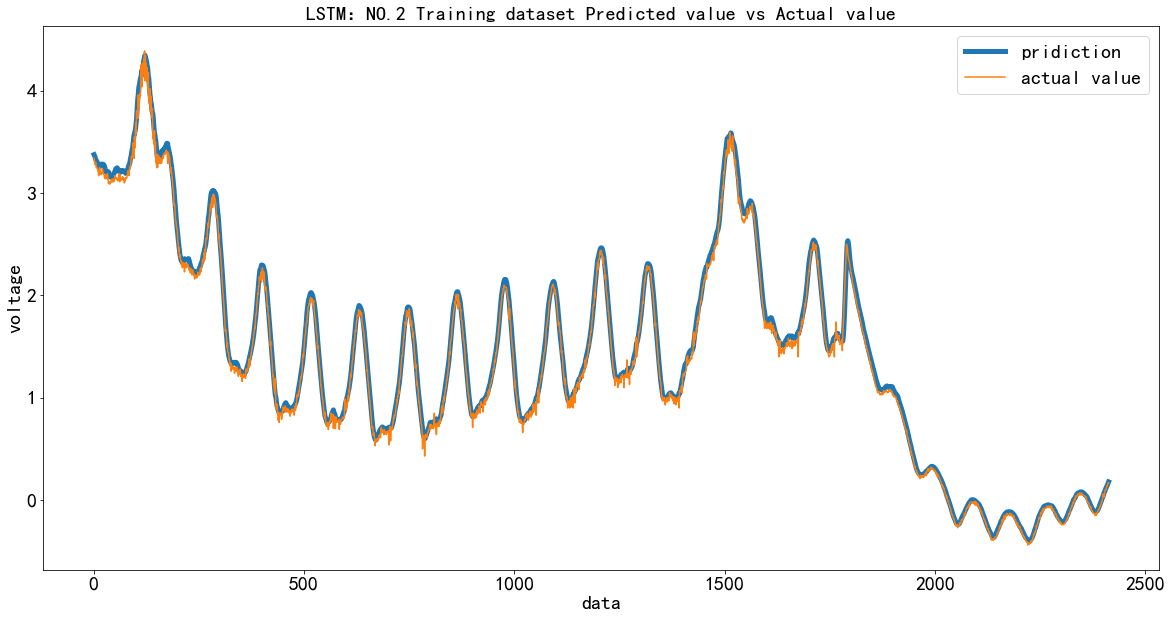

In [34]:
plt.figure(figsize=(20,10))
plt.plot([i + 1 for i in range(len(pre_train))], pre_train, label="pridiction",linewidth=5)
plt.plot([i + 1 for i in range(len(train_Y))], train_Y, label="actual value")
plt.legend(fontsize=20)
plt.ylabel('voltage', fontsize=20)
plt.xlabel('data',fontsize=20)
plt.title('LSTM：NO.2 Training dataset Predicted value vs Actual value', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

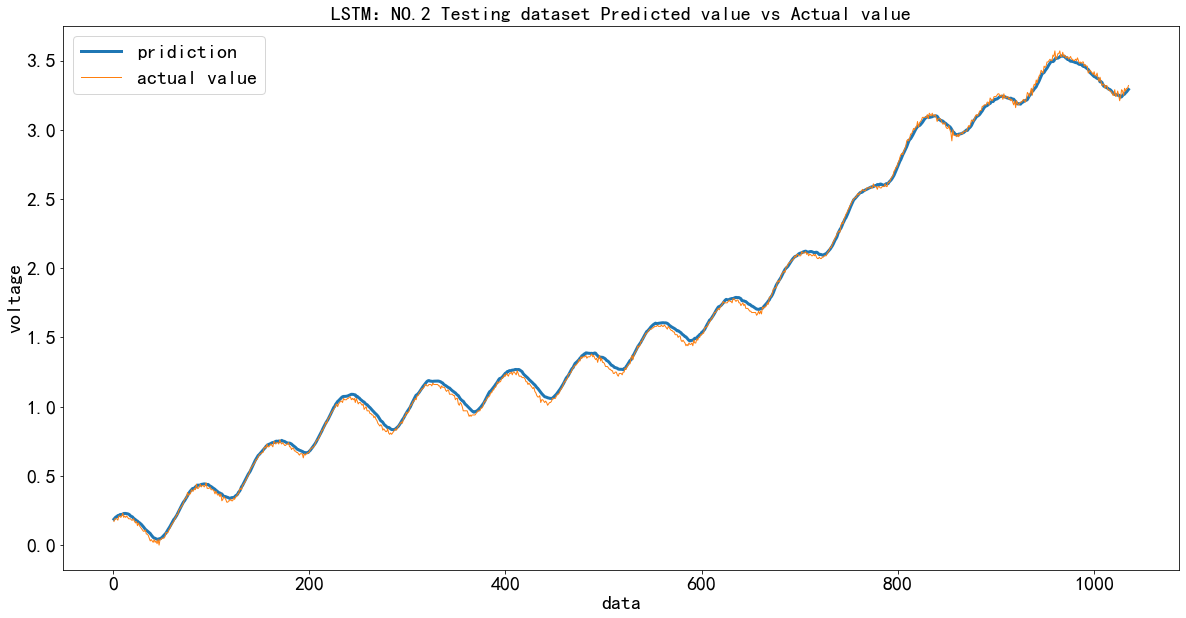

In [35]:
plt.figure(figsize=(20,10))
plt.plot([i + 1 for i in range(len(pre_test))], pre_test, label="pridiction",linewidth=3)
plt.plot([i + 1 for i in range(len(test_Y))], test_Y, label="actual value",linewidth=1)

plt.legend(fontsize=20)
plt.ylabel('voltage',fontsize=20)
plt.title('LSTM：NO.2 Testing dataset Predicted value vs Actual value',fontsize=20)
plt.xlabel('data',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [36]:
pre_test.shape

(1035, 1)

In [37]:
test_Y.shape

(1035,)

In [38]:
error = pre_test.ravel() - test_Y

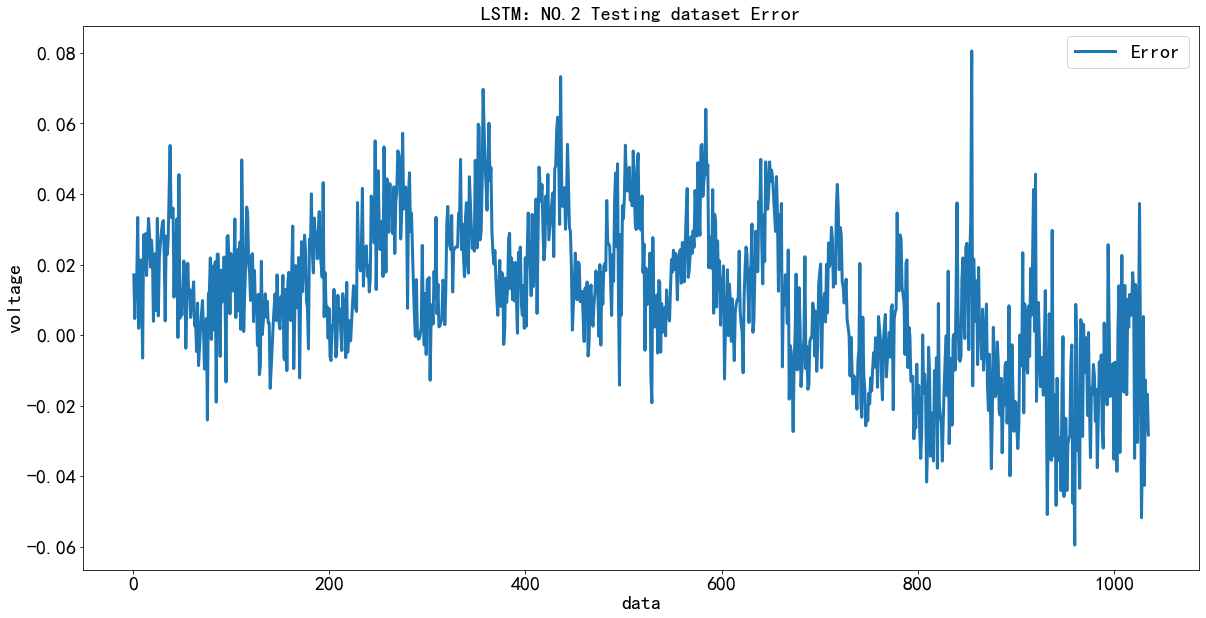

In [39]:
matplotlib.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(20,10))
plt.plot([i + 1 for i in range(len(pre_test))], error, label="Error",linewidth=3)

plt.legend(fontsize=20)
plt.ylabel('voltage',fontsize=20)
plt.title('LSTM：NO.2 Testing dataset Error',fontsize=20)
plt.xlabel('data',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [40]:
data1 = pd.read_excel(r'../data/DATA_XUNLIAN_3.xlsx')
pd.date_range(start = '2019-1-1',periods = len(data1),freq ="D").values 
data1["Time"] = pd.date_range(start = '2019-1-1',periods = len(data1),freq ="D").values

In [41]:
data = data1.drop(columns = ['Time'])

In [42]:
def build_model(train_x, train_y,test_x, test_y):
    model = Sequential()
    model.add(LSTM(200,activation='relu',input_shape=(50,3)))
    model.add(Dense(12, input_dim=1,activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer='adam')
    model.fit(train_x, train_y, epochs=50, batch_size=64, verbose=0,validation_data=(test_x,test_y))

    plt.figure(figsize=(20,10))
    plt.plot(model.history.history['loss'])
    plt.plot(model.history.history['val_loss'])
    plt.title("LSTM：Dataset NO.3: MAE", fontsize=20)
    plt.ylabel("MAE", fontsize=20)
    plt.xlabel("epoch", fontsize=20)
    plt.legend(["train","test"],loc="upper left", fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()
    
    print(model.summary())
    return model

In [43]:
dmax = numpy.max(data.values, axis=0)
dmin = numpy.min(data.values, axis=0)
for i in range(data.values.shape[1]):
    data.values[:, i] = (data.values[:, i] - dmin[i])/(dmax[i] - dmin[i])

In [44]:
timestep = 50
def gen_data(dataset, timestep):
    XX = []
    YY = []
    for i in range(dataset.shape[0] - timestep - 1):
        XX.append(dataset[i:i+timestep, :])
        YY.append(dataset[i+timestep, 2])

    train_X = XX[:int(0.7 * len(XX))]
    train_X = array(train_X)

    train_Y = YY[:int(0.7 * len(XX))]
    train_Y = array(train_Y)

    test_X = XX[int(0.7 * len(XX)):]
    test_X = array(test_X)

    test_Y = YY[int(0.7 * len(XX)):]
    test_Y = array(test_Y)

    return train_X, train_Y, test_X, test_Y

In [45]:
train_X, train_Y, test_X, test_Y = gen_data(data.values,50)

In [46]:
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

(2553, 50, 3) (2553,) (1095, 50, 3) (1095,)


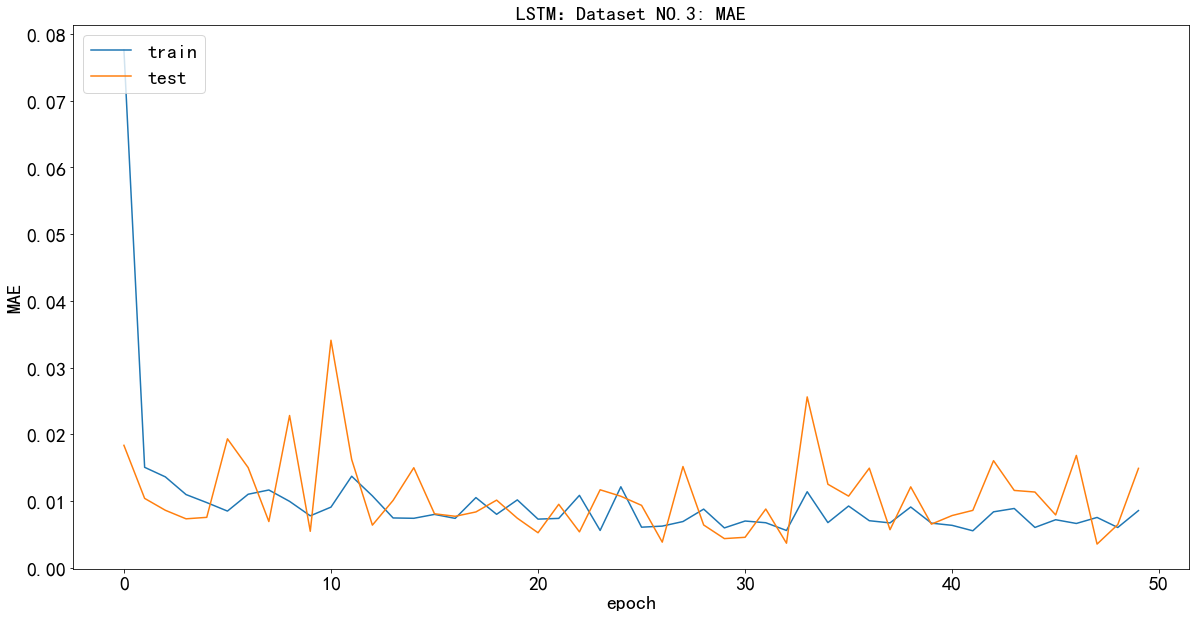

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 200)               163200    
_________________________________________________________________
dense_5 (Dense)              (None, 12)                2412      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 13        
Total params: 165,625
Trainable params: 165,625
Non-trainable params: 0
_________________________________________________________________
None


In [47]:
model = build_model(train_X, train_Y, test_X, test_Y)
pre_train = model.predict(train_X)
pre_test = model.predict(test_X)

In [48]:
pre_train = pre_train * (dmax[2] - dmin[2]) + dmin[2]
train_Y = train_Y * (dmax[2] - dmin[2]) + dmin[2]
pre_test = pre_test * (dmax[2] - dmin[2]) + dmin[2]
test_Y = test_Y * (dmax[2] - dmin[2]) + dmin[2]

In [49]:
s0_train = mean_squared_error(pre_train, train_Y)
s1_train = mean_absolute_error(pre_train, train_Y)

In [50]:
s0_test = mean_squared_error(pre_test, test_Y)
s1_test = mean_absolute_error(pre_test, test_Y)

In [51]:
print('training set MSE:', s0_train)
print('training set MAE:', s1_train)
print('testing set MSE:', s0_test)
print('testing set MAE:', s1_test)

training set MSE: 0.0025368658808948633
training set MAE: 0.039645313604924896
testing set MSE: 0.0038799484999704325
testing set MAE: 0.05807446690999213


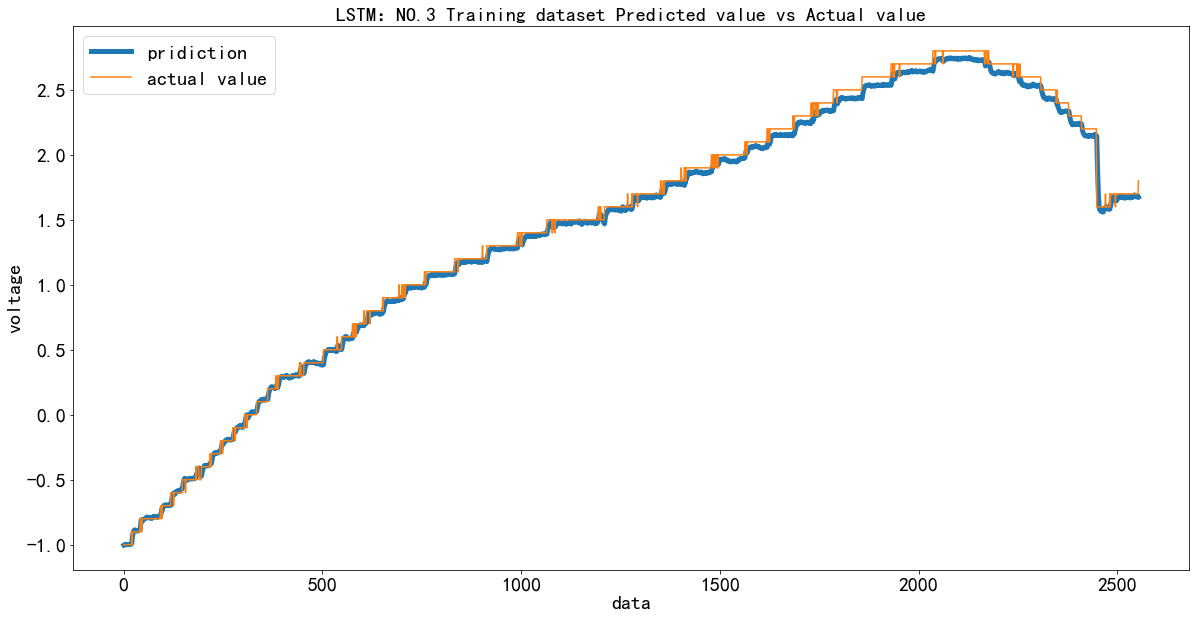

In [52]:
plt.figure(figsize=(20,10))
plt.plot([i + 1 for i in range(len(pre_train))], pre_train, label="pridiction",linewidth=5)
plt.plot([i + 1 for i in range(len(train_Y))], train_Y, label="actual value")
plt.legend(fontsize=20)
plt.ylabel('voltage', fontsize=20)
plt.xlabel('data',fontsize=20)
plt.title('LSTM：NO.3 Training dataset Predicted value vs Actual value', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

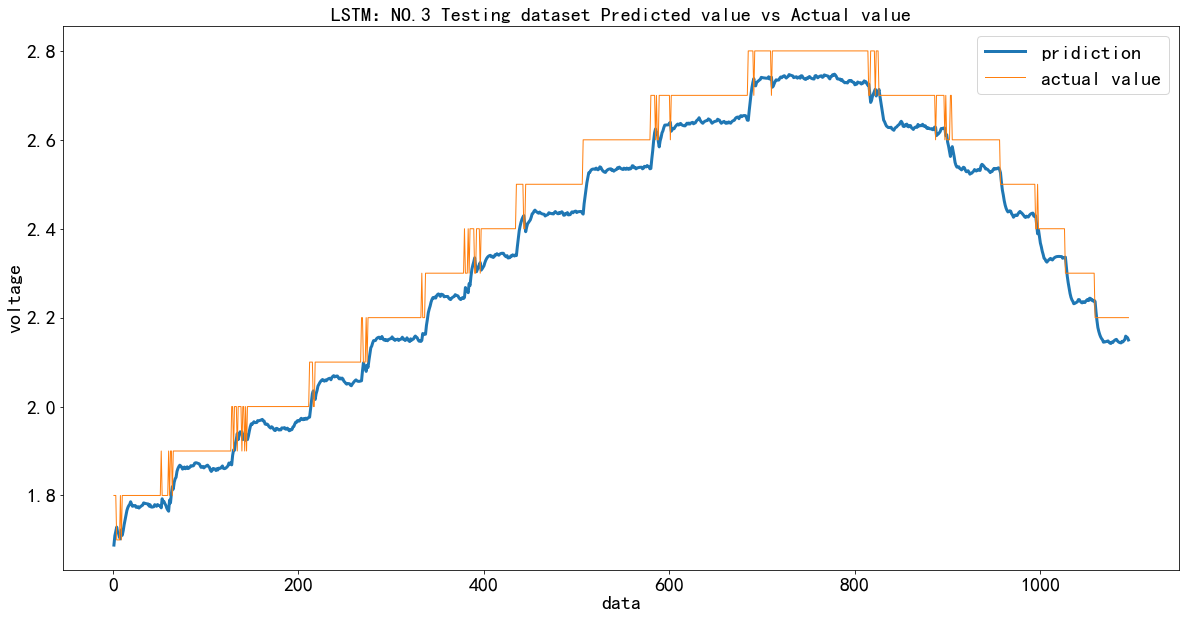

In [53]:
plt.figure(figsize=(20,10))
plt.plot([i + 1 for i in range(len(pre_test))], pre_test, label="pridiction",linewidth=3)
plt.plot([i + 1 for i in range(len(test_Y))], test_Y, label="actual value",linewidth=1)

plt.legend(fontsize=20)
plt.ylabel('voltage',fontsize=20)
plt.title('LSTM：NO.3 Testing dataset Predicted value vs Actual value',fontsize=20)
plt.xlabel('data',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [54]:
pre_test.shape

(1095, 1)

In [55]:
test_Y.shape

(1095,)

In [56]:
error = pre_test.ravel() - test_Y

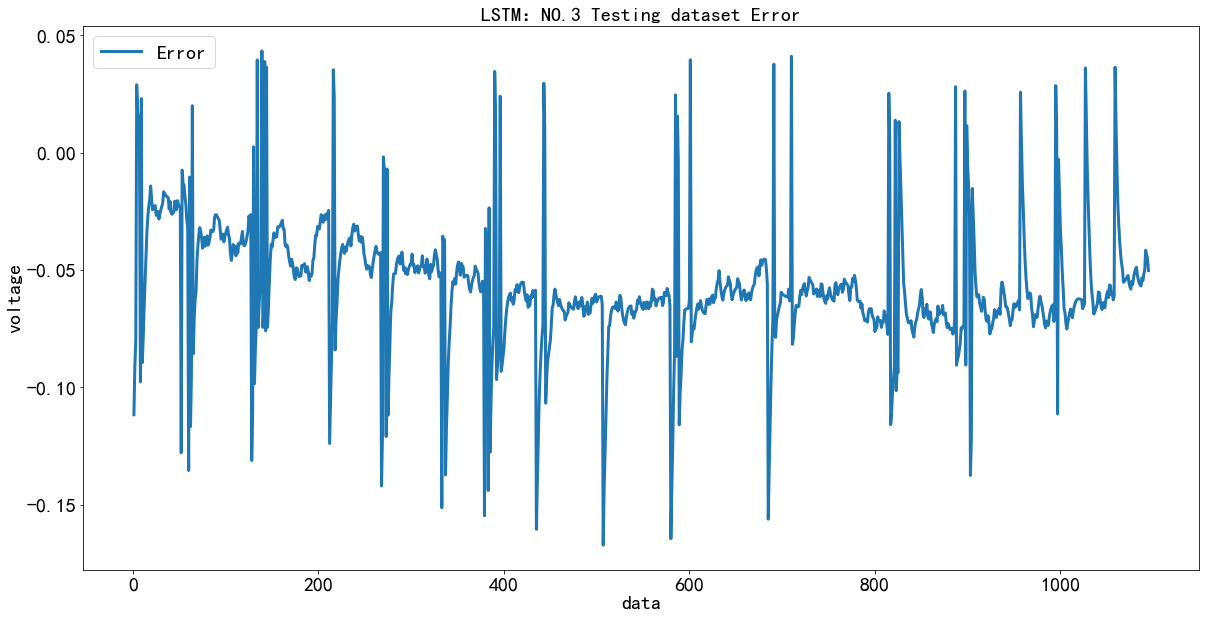

In [57]:
matplotlib.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(20,10))
plt.plot([i + 1 for i in range(len(pre_test))], error, label="Error",linewidth=3)

plt.legend(fontsize=20)
plt.ylabel('voltage',fontsize=20)
plt.title('LSTM：NO.3 Testing dataset Error',fontsize=20)
plt.xlabel('data',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()